# JOB MARKET ANALYSIS

## 1. Web Scraping using Selenium

In [1]:
#import necessary packages
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
import matplotlib.pyplot as plt


#create an instance of browser
driver = webdriver.Chrome()

#creating a dictionary for storing the information after scraping
jobs={"roles":[],
     "companies":[],
     "locations":[],
     "experience":[],
     "skills":[]}


In [2]:
for i in range(5):
        driver.get("https://www.naukri.com/jobs-in-india-{}".format(i))
        time.sleep(3)
        lst=driver.find_elements(By.CSS_SELECTOR, '.jobTuple.bgWhite.br4.mb-8')
        for job in lst:
            try:
                driver.implicitly_wait(3)
                role=job.find_element(By.CSS_SELECTOR,"a.title.fw500.ellipsis").text
                company=job.find_element(By.CSS_SELECTOR, "a.subTitle.ellipsis.fleft").text
                location=job.find_element(By.CSS_SELECTOR, ".fleft.grey-text.br2.placeHolderLi.location").text
                exp=job.find_element(By.CSS_SELECTOR, ".fleft.grey-text.br2.placeHolderLi.experience").text
                skills=job.find_element(By.CSS_SELECTOR, ".tags.has-description").text
                jobs["roles"].append(role)
                jobs["companies"].append(company)
#                 jobs["locations"].append(location)
                jobs["experience"].append(exp)
#                 jobs["skills"].append(skills)

                month,day=[],[]
                month.append(skills.lower())
                day.append(location.lower())

                for i in month:
                    x=(i.split('\n'))
                    jobs["skills"].append(x)
                    
                
                d=[]  
                for j in day:
                    y=(j.split(','))
                    for t in y:
                        d.append(t.lstrip())
                    jobs["locations"].append(d)


            except NoSuchElementException:
                print("Scraping Done")
                break
            except NameError:
                pass
print("Scraping Done")

Scraping Done


In [3]:
import pandas as pd
DS_jobs_df=pd.DataFrame(jobs)

In [5]:
DS_jobs_df.to_csv("final.csv")

## 2. Pre-processing

In [6]:
DS_jobs_df=pd.read_csv("final.csv", index_col=0)
DS_jobs_df.tail(5)

,roles,companies,locations,experience,skills
95,SAP ABAP Consultant,NTT DATA Business Solutions Private Limited,"['hyderabad/secunderabad', 'pune', 'chennai', ...",6-9 Yrs,"['odata', 'sap abap', 'oo abap', 'debugging', ..."
96,Hiring Freshers - Non Voice Process,Cognizant,"['noida', 'hyderabad/secunderabad', 'pune', 'c...",0-0 Yrs,"['night shift', 'non voice process']"
97,Lead Data & Analytics Architect,Baker Hughes,"['mumbai', 'hyderabad/secunderabad', 'bangalor...",8-13 Yrs,"['process optimization', 'operational support'..."
98,Full Stack Engineer - Senior Associate - P&T Labs,PwC,"['mumbai', 'hyderabad/secunderabad', 'bangalor...",2-5 Yrs,"['automation', 'front end', 'web technologies'..."
99,Quality Engineer (Functional) - Senior Associate,PwC,"['mumbai', 'hyderabad/secunderabad', 'bangalor...",4-9 Yrs,"['manager quality assurance', 'jquery', 'consu..."


In [7]:
#lets check if our data have any null values
DS_jobs_df.isna().sum()

roles         0
companies     0
locations     0
experience    0
skills        0
dtype: int64

In [8]:
#lets drop the missing values
DS_jobs_df=DS_jobs_df.dropna()

In [38]:
#lets check if our data have any dupplicate data
DS_jobs_df[DS_jobs_df.duplicated(subset=["roles","companies","roles","locations","skills"])].shape

(20, 5)

In [ ]:
HR point of view

In [10]:
x = "js"
for i in jobs["skills"]:
    for j in i:
        if x in j and x not in ["skills"]:
            print("yes")
        print(j)
    print("--------------------")
    

investment banking
change management
transformation
business analytics
gaap
data lineage
target operating model
capital market
--------------------
banking
structured products
credit cards
--------------------
angular
javascript
yes
react js
html
css
scss
yes
node js
dom
--------------------
python
sql
it skills
--------------------
collibra
sql
python
java
it skills
--------------------
flink
kafka
apache flink
sql
--------------------
hyperion drm
--------------------
hyperion
hyperion essbase
hyperion planning
--------------------
product management
business process
consulting
agile
marketing communication
communication
written
interpersonal skills
--------------------
business process
data management
consulting
scheduling
analytics
sales operations
sales enablement
powerpoint
--------------------
product management
business process
consulting
agile
proposal development
communication
written
interpersonal skills
--------------------
consumer internet
online product management
it ski

## 3. Exploratory Data analysis

In [ ]:
data=pd.read_csv("final.csv")

#Manipulating the csv

loc = data["locations"]
comp=data["skills"]
nameor=data["roles"]
nameoc=data["companies"]
res,res2,user,uskill,cskill=[],[],[],[],[]
a = 'y'
while (a):
    user.append("'"+input("Enter Skill: ")+"'")
    a = input("Do you want to continue? (y/n)")
    print("\n")
    if (a=='y'):
        continue
    else:
        break
    
# for i in range(5):
#     user.append("'"+input("Enter Skill: ")+"'")
# print("\n")
       
for i in user:
    res.append(i.strip('][').split(', '))
for i in res:
    uskill.append(i[0])
uskill=set(uskill)


for i in comp:
    res2.append(i.strip('][').split(', '))
for i in res2:
    x=set(i)
    cskill.append(x)
    
fin=[]

for i in cskill:
    match=len(i.intersection(uskill))
    c = round(match / len(i), 2)
    fin.append(float(c))

    
    
    
for i in range(len(nameoc)):
    print(nameoc[i]," : ",nameor[i]," : ",fin[i]*100, "%")

Enter Skill: js
Do you want to continue? (y/n)y


Enter Skill: radiology
Do you want to continue? (y/n)y


Enter Skill: java
Do you want to continue? (y/n)y




In [12]:
loc = data["locations"]
comp=data["skills"]
nameor=data["roles"]
nameoc=data["companies"]
resloc,res2loc,userloc,uloc,cloc=[],[],[],[],[]

for i in range(1):
    userloc.append(input("Enter Location: "))
print("\n")
       
for i in userloc:
    resloc.append(i.strip('][').split(', '))
for i in resloc:
    uloc.append(i[0])
uloc=set(uloc)


for i in loc:
    res2loc.append(i.strip('][').split(', '))

for i in res2loc:
    x=set(i)
    cloc.append(x)
# print(cloc)
    
finloc=[]

for i in cloc:
    match2=len(i.intersection(uloc))
    d = round(match2/len(i), 2)
    finloc.append(float(d))

    
    
    
for i in range(len(nameoc)):
    print(nameoc[i]," : ",nameor[i]," : ",finloc[i])

Enter Location:  pune


Accenture  :  Content Lead - Manager  :  0.0
Capgemini  :  Architect  :  0.0
Capgemini  :  Microsoft Dynamics CRM Architect  :  0.0
Capgemini  :  Salesforce Solution Architect  :  0.0
Capgemini  :  Salesforce Technical Architect  :  0.0
Franchise Alpha  :  Key Account Manager  :  0.0
Pearson  :  Pearson - Project Manager  :  0.0
Accenture  :  Contract Specialist  :  0.0
Capgemini  :  Salesforce Technical Architect  :  0.0
Mindtree  :  Reactjs developer  :  0.0
Mindtree  :  Immediate Hiring For Service Now Developer with top MNC Mindtree  :  0.0
Tech Mahindra  :  Azure DevOps scripter || Open location || Immediate Role  :  0.0
Mindtree  :  Urgent requirement For Azure/AWS Devops Lead  :  0.0
Oracle  :  VBCS-Full Stack-UI and Integration-Oracle PaaS  :  0.0
Tech Mahindra  :  Opening with Tech Mahindra For Inside Sales Executive  :  0.0
Icici Bank  :  Global Client Group- Senior Relationship Manager  :  0.0
HCLTech  :  HCL Technologies Hiring For Java Architecture 

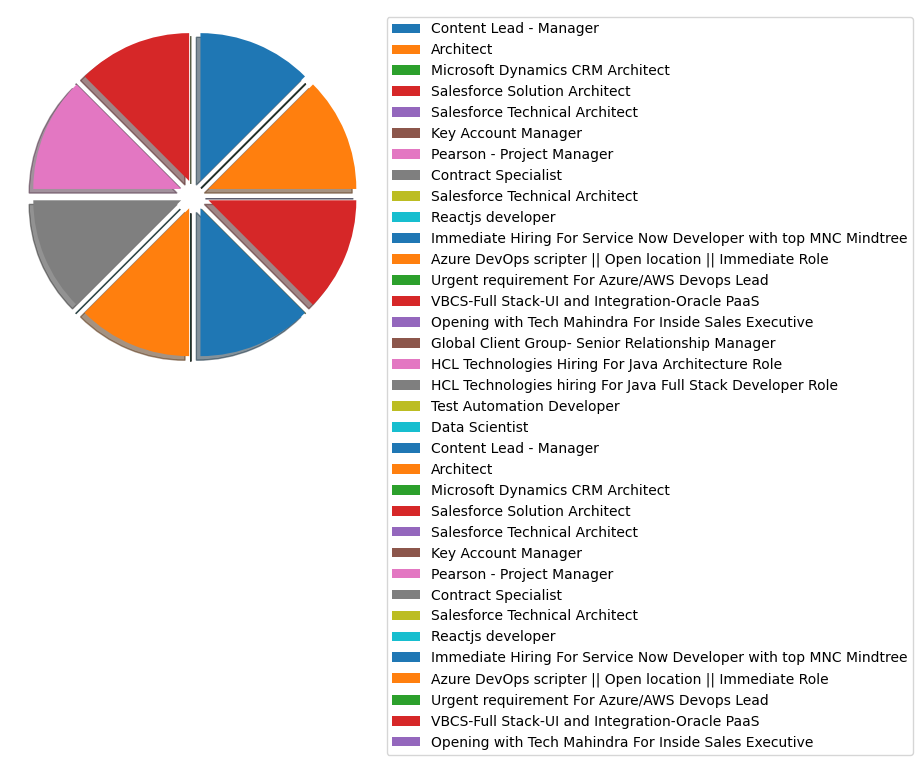

In [34]:
pie=[]
for j in range(35):
    pie.append(fin[j])
mylabels=data['roles']
plt.pie(pie,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],shadow="True")

plt.legend(labels=mylabels, loc="upper left",bbox_to_anchor=(1,1) )
plt.show()

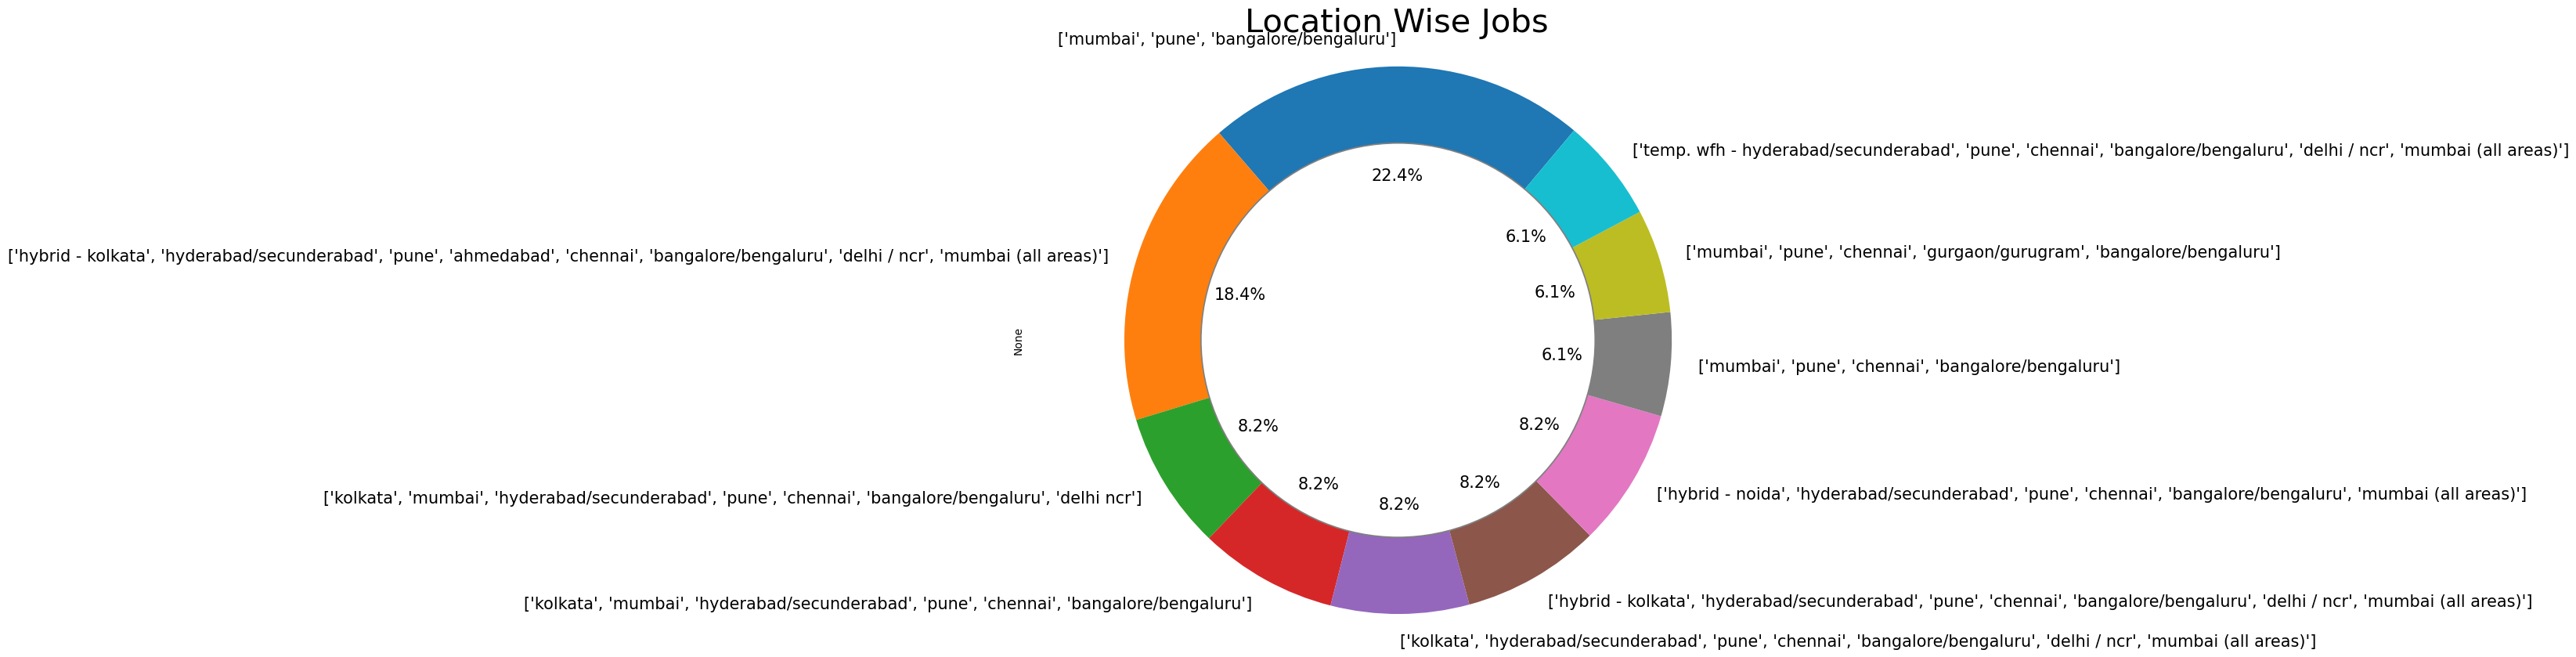

In [35]:
DS_jobs_df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Location Wise Jobs",fontsize=30)

centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

### 3.2 Companies with Job Openings

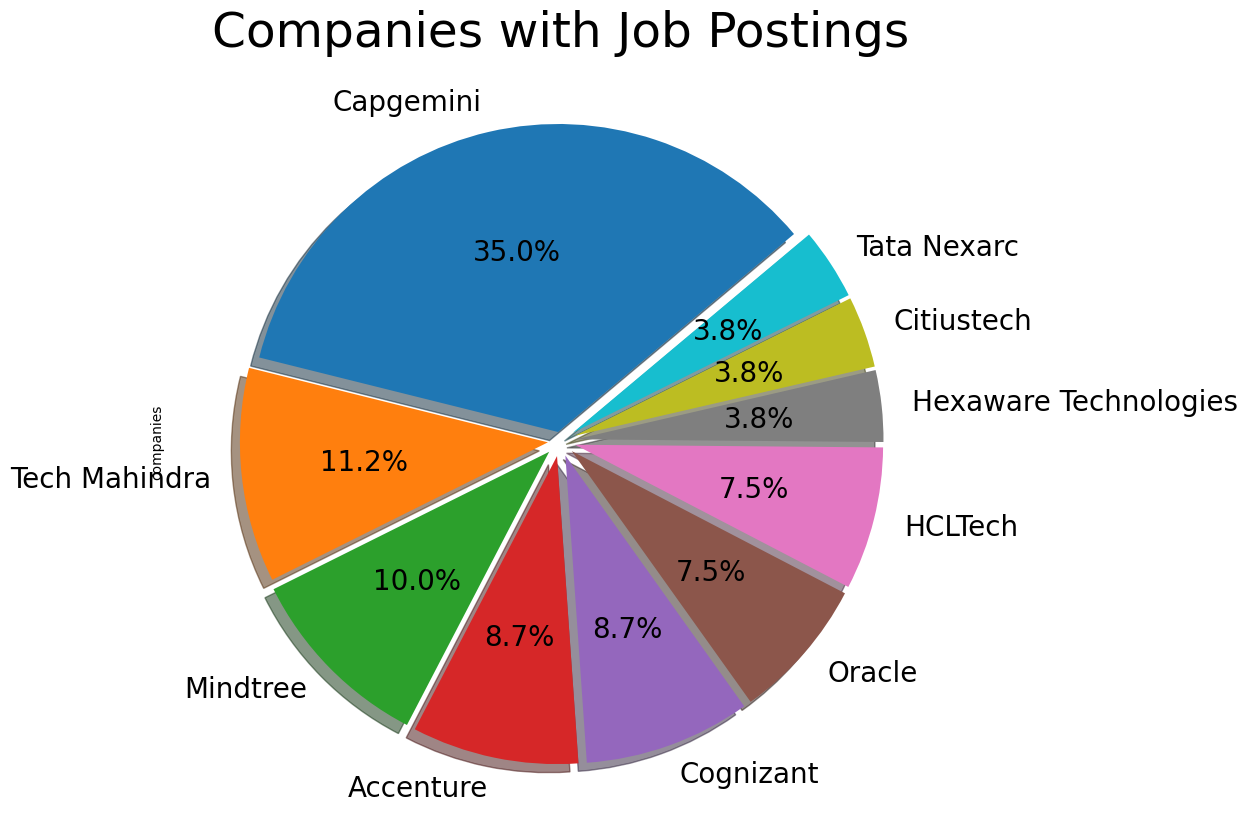

In [36]:
DS_jobs_df["companies"].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
plt.title("Companies with Job Postings",fontsize=35)
plt.show()

### 3.4. Desired Experience for Jobs

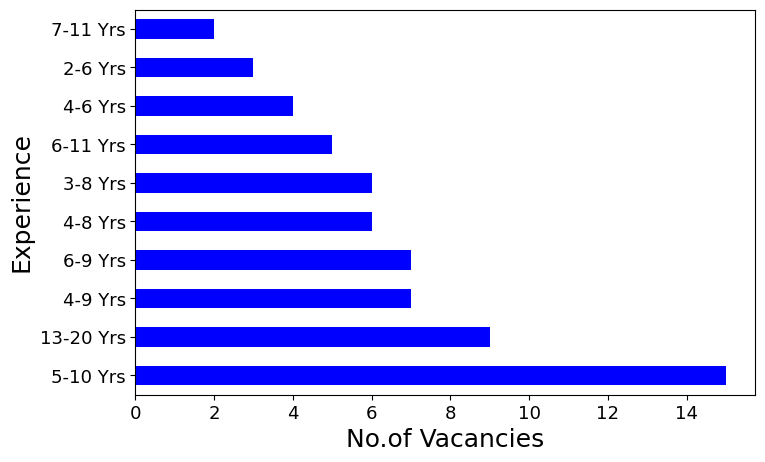

In [37]:
DS_jobs_df["experience"].value_counts()[:10].plot.barh(figsize=(8,5),fontsize=13,color="b")
plt.xlabel("No.of Vacancies",fontsize=18)
plt.ylabel("Experience",fontsize=18)
plt.show()